# Fashion MNIST
by uramoon@kw.ac.kr (<a href="https://raw.githubusercontent.com/ronreiter/interactive-tutorials/master/LICENSE">Apache 2.0 License</a>)

Fashion MNIST는 MNIST와 동일한 입출력 구조를 지니고 있으나 숫자 대신 의류의 종류를 예측합니다.

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.

The classes are:

0:	T-shirt/top
1:	Trouser
2:	Pullover
3:	Dress
4:	Coat
5:	Sandal
6:	Shirt
7:	Sneaker
8:	Bag
9:	Ankle boot

In [27]:
# 데이터셋 불러오기
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## TODO 1: 훈련 데이터 살펴보기

1. 훈련 데이터의 처음 세 장을 그려보세요.

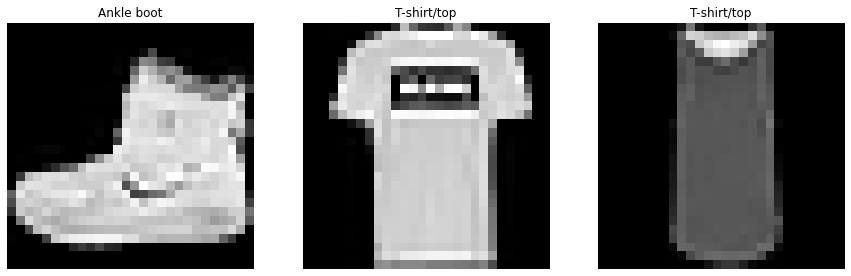

In [28]:
# TODO: 아래 빈 칸을 채우세요.
import matplotlib.pyplot as plt
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(15, 10))
for idx in range(3):
  plt.subplot(1, 3, idx+1)        # 행은 1개, 열은 3개, 몇 번째 그림을 그릴 것인지 기재 (1부터 시작하는 숫자)
  plt.imshow(train_images[idx], cmap='gray')  # 이미지 흑백으로 그리기
  plt.title(class_names[train_labels[idx]])                # 그림 제목으로 정답 (label)을 표시해보세요. 예: 숫자가 아닌 Shirt, Bag 등
  plt.axis('off')
plt.show()

## TODO 2: 데이터 전처리 (모양 바꾸기, 정규화, 레이블 변환)
레이블 변환은 하지 않고 TODO3의 loss에 'categorical_crossentropy' 대신 'sparse_categorical_crossentropy'를 사용해도 됩니다.

In [29]:
from keras.utils import to_categorical

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)


## TODO 3: 모델 훈련 (모델 생성, compile, fit, evaluate)
테스트 데이터에 대해 88% 이상의 정확도를 보이는 모델을 만들어 보세요.

In [30]:
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping

network = models.Sequential()
network.add(layers.Input(784,)) # (784)는 784라는 정수, (784,)는 길이 784인 일차원 배열을 의미
network.add(layers.Dense(512, activation='relu')) 
network.add(layers.Dense(256, activation='relu')) 
network.add(layers.Dense(10, activation='softmax')) 

network.compile(optimizer='rmsprop',              
                loss='sparse_categorical_crossentropy',  
                metrics=['accuracy'])

network.fit(train_images, train_labels, batch_size=128, epochs=10000, 
            callbacks=EarlyStopping(patience=7),                 
            validation_split=0.1)                                    
test_loss, test_acc = network.evaluate(test_images, test_labels)
print(f'Test Accuracy:{test_acc * 100:.2f}%')

Epoch 1/10000
422/422 [==============================] - 3s 4ms/step - loss: 0.5549 - accuracy: 0.7973 - val_loss: 0.4547 - val_accuracy: 0.8168
Epoch 2/10000
422/422 [==============================] - 1s 3ms/step - loss: 0.3830 - accuracy: 0.8588 - val_loss: 0.3911 - val_accuracy: 0.8550
Epoch 3/10000
422/422 [==============================] - 1s 3ms/step - loss: 0.3408 - accuracy: 0.8736 - val_loss: 0.3268 - val_accuracy: 0.8797
Epoch 4/10000
422/422 [==============================] - 1s 3ms/step - loss: 0.3111 - accuracy: 0.8834 - val_loss: 0.3782 - val_accuracy: 0.8650
Epoch 5/10000
422/422 [==============================] - 1s 3ms/step - loss: 0.2916 - accuracy: 0.8928 - val_loss: 0.3551 - val_accuracy: 0.8780
Epoch 6/10000
422/422 [==============================] - 1s 3ms/step - loss: 0.2746 - accuracy: 0.8965 - val_loss: 0.3136 - val_accuracy: 0.8848
Epoch 7/10000
422/422 [==============================] - 1s 3ms/step - loss: 0.2592 - accuracy: 0.9019 - val_loss: 0.3194 - val_ac

## TODO 4: 틀린 예제 확인하기
TODO 3에서 만든 모델이 잘못 분류하는 그림을 테스트 데이터에서 하나 이상 찾아 그려보세요. <br>
(원래 레이블과 모델이 예측한 레이블은 그림 제목에 표시)

313/313 [==============================] - 1s 2ms/step


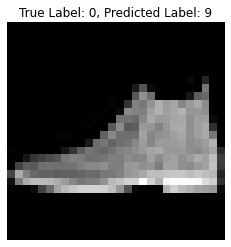

In [32]:
import numpy as np

predictions = network.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

misclassified = np.where(predicted_labels != np.argmax(test_labels))[0]

index = misclassified[0]
plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
plt.title(f'True Label: {np.argmax(test_labels[index])}, Predicted Label: {predicted_labels[index]}')
plt.axis('off')
plt.show()
